In [2]:
import ipympl
%matplotlib widget
%matplotlib inline
import ipywidgets as widgets
import matplotlib.pyplot as plt
import matplotlib.widgets as widget
import numpy as np
import sympy as sy
from sympy import *
import pandas as pd
from causalgraphicalmodels import CausalGraphicalModel
import os
os.environ["PATH"] += os.pathsep + 'C:/Program Files/Graphviz/bin/'
from IPython.display import Image
import warnings
warnings.filterwarnings('ignore')

# Mercado de Bienes: Consumo, Inversión, Determinación del Precio, y la Política Fiscal

## Modelo Keynesiano: 

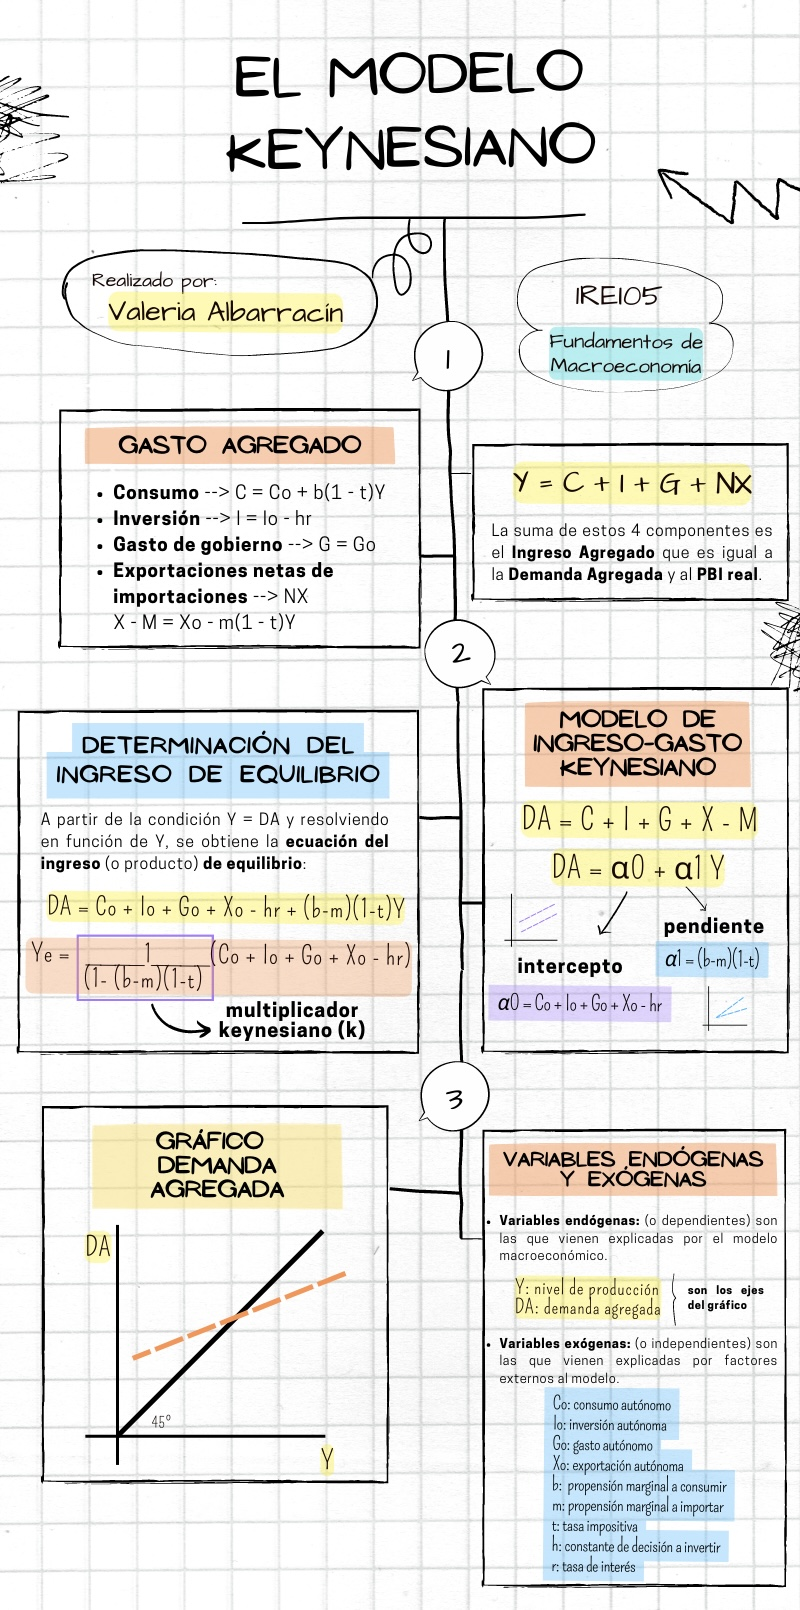

In [3]:
Image('tutorial2.jpg')

## El modelo de Ingreso-Gasto Keynesiano:

La ecuación de equilibrio para el Ingreso Agregado se deriva de la condición de equilibrio donde el ingreso es igual a la demanda agregada: $DA = Y$:

$$ DA = C + I + G + X - M $$

Donde:

$$ C = C_0 + bY^d $$
$$ I = I_0 - hr $$
$$ G = G_0 $$
$$ X = X_0 $$
$$ M = mY^d $$

$$ Y^d = 1 - t $$

Entonces: 

$$ DA = C_0 + I_0 + G_0 + X_0 - hr + Y(b - m)(1 - t) $$

De forma corta:

$$ DA = α_0 + α_1Y $$

Donde $ α_0 = (C_0 + I_0 + G_0 + X_0 -hr)$ es el intercepto y $ α_1 = (b - m)(1 - t) $ es la pendiente de la función

Ahora, considerando la condición de equilibrio $Y = DA$, la ecuación del ingreso de equilibrio a corto plazo es:

$$ Y = C_0 + bY^d + I_0 -hr + G_0 + X_0 - mY^d $$

$$ Y = \frac{1}{1 - (b - m)(1 - t)} (C_0 + I_0 + G_0 + X_0 - hr) $$

El ingreso de Equilibrio a corto plazo se grafica de la siguiente forma:

In [4]:
# Parámetros

Y_size = 100 

Co = 35
Io = 40
Go = 70
Xo = 2
h = 0.7
b = 0.8 # b > m
m = 0.2
t = 0.3
r = 0.9

Y = np.arange(Y_size)

# Ecuación de la curva del ingreso de equilibrio

def DA_K(Co, Io, Go, Xo, h, r, b, m, t, Y):
    DA_K = (Co + Io + Go + Xo - h*r) + ((b - m)*(1 - t)*Y)
    return DA_K

DA_IS_K = DA_K(Co, Io, Go, Xo, h, r, b, m, t, Y)

In [5]:
# Recta de 45°

a = 2.5 

def L_45(a, Y):
    L_45 = a*Y
    return L_45

L_45 = L_45(a, Y)

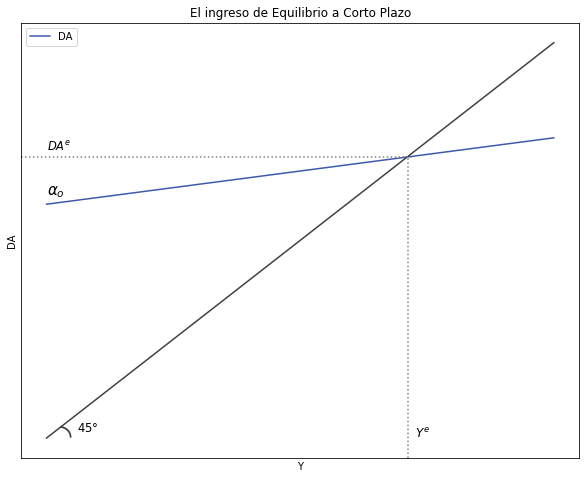

In [6]:
# Gráfico

# Dimensiones del gráfico
y_max = np.max(DA_IS_K)
fig, ax = plt.subplots(figsize=(10, 8))

# Curvas a graficar
ax.plot(DA_IS_K, label = "DA", color = "#3D59AB") #Demanda agregada
ax.plot(L_45, color = "#404040") #Línea de 45º

# Eliminar las cantidades de los ejes
ax.yaxis.set_major_locator(plt.NullLocator())   
ax.xaxis.set_major_locator(plt.NullLocator())

# Líneas punteadas punto de equilibrio
plt.axvline(x=70.5,  ymin= 0, ymax= 0.69, linestyle = ":", color = "grey")
plt.axhline(y=176, xmin= 0, xmax= 0.7, linestyle = ":", color = "grey")

# Texto agregado
    # punto de equilibrio
plt.text(0, 180, '$DA^e$', fontsize = 11.5, color = 'black')
plt.text(72, 0, '$Y^e$', fontsize = 12, color = 'black')
plt.text(0, 152, '$α_o$', fontsize = 15, color = 'black')
    # línea 45º
plt.text(6, 4, '$45°$', fontsize = 11.5, color = 'black')
plt.text(2.5, -3, '$◝$', fontsize = 30, color = '#404040')

# Título y leyenda
ax.set(title="El ingreso de Equilibrio a Corto Plazo", xlabel= r'Y', ylabel= r'DA')
ax.legend() #mostrar leyenda

plt.show()


In [7]:
# líneas punteadas autómaticas

    # definir la función line_intersection
def line_intersection(line1, line2):
    xdiff = (line1[0][0] - line1[1][0], line2[0][0] - line2[1][0])
    ydiff = (line1[0][1] - line1[1][1], line2[0][1] - line2[1][1])

    def det(a, b):
        return a[0] * b[1] - a[1] * b[0]

    div = det(xdiff, ydiff)
    if div == 0:
       raise Exception('lines do not intersect')

    d = (det(*line1), det(*line2))
    x = det(d, xdiff) / div
    y = det(d, ydiff) / div
    return x, y

    # coordenadas de las curvas (x,y)
A = [DA_IS_K[0], Y[0]] # DA, coordenada inicio
B = [DA_IS_K[-1], Y[-1]] # DA, coordenada fin

C = [L_45[0], Y[0]] # L_45, coordenada inicio
D = [L_45[-1], Y[-1]] # L_45, coordenada fin

    # creación de intersección

intersec = line_intersection((A, B), (C, D))
intersec # (y,x)

(175.9254807692308, 70.37019230769232)

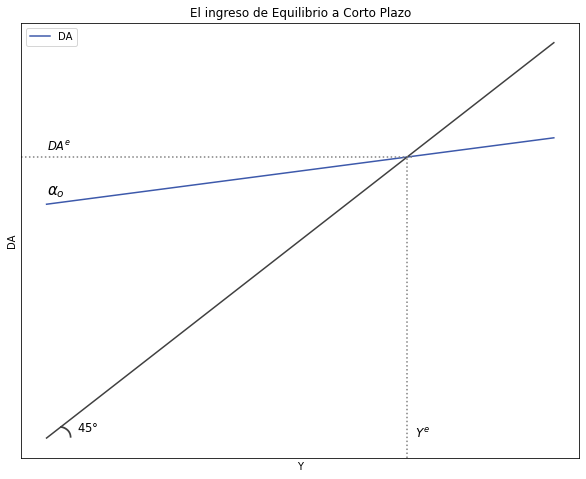

In [8]:
# Gráfico

# Dimensiones del gráfico
y_max = np.max(DA_IS_K)
fig, ax = plt.subplots(figsize=(10, 8))

# Curvas a graficar
ax.plot(Y, DA_IS_K, label = "DA", color = "#3D59AB") #Demanda agregada
ax.plot(Y, L_45, color = "#404040") #Línea de 45º

# Eliminar las cantidades de los ejes
ax.yaxis.set_major_locator(plt.NullLocator())   
ax.xaxis.set_major_locator(plt.NullLocator())

# Líneas punteadas punto de equilibrio
plt.axhline(y=intersec[0], xmin= 0, xmax= 0.7, linestyle = ":", color = "grey")
plt.axvline(x=intersec[1],  ymin= 0, ymax= 0.69, linestyle = ":", color = "grey")

# Texto agregado
    # punto de equilibrio
plt.text(0, 180, '$DA^e$', fontsize = 11.5, color = 'black')
plt.text(72, 0, '$Y^e$', fontsize = 12, color = 'black')
plt.text(0, 152, '$α_o$', fontsize = 15, color = 'black')
    # línea 45º
plt.text(6, 4, '$45°$', fontsize = 11.5, color = 'black')
plt.text(2.5, -3, '$◝$', fontsize = 30, color = '#404040')

# Título y leyenda
ax.set(title="El ingreso de Equilibrio a Corto Plazo", xlabel= r'Y', ylabel= r'DA')
ax.legend() #mostrar leyenda

plt.show()

### Estática comparativa del modelo de Ingreso-Gasto Keynesiano:

#### Política Fiscal contractiva con reducción del Gasto del Gobierno $(G_0)$:

In [9]:
#--------------------------------------------------
# Curva de ingreso de equilibrio ORIGINAL

    # Parámetros
Y_size = 100 

Co = 35
Io = 40
Go = 70
Xo = 2
h = 0.7
b = 0.8
m = 0.2
t = 0.3
r = 0.9

Y = np.arange(Y_size)

    # Ecuación 
def DA_K(Co, Io, Go, Xo, h, r, b, m, t, Y):
    DA_K = (Co + Io + Go + Xo - h*r) + ((b - m)*(1 - t)*Y)
    return DA_K

DA_IS_K = DA_K(Co, Io, Go, Xo, h, r, b, m, t, Y)


#--------------------------------------------------
# NUEVA curva de ingreso de equilibrio

    # Definir SOLO el parámetro cambiado
Go = 35

# Generar la ecuación con el nuevo parámetro
def DA_K(Co, Io, Go, Xo, h, r, b, m, t, Y):
    DA_K = (Co + Io + Go + Xo - h*r) + ((b - m)*(1 - t)*Y)
    return DA_K

DA_G = DA_K(Co, Io, Go, Xo, h, r, b, m, t, Y)

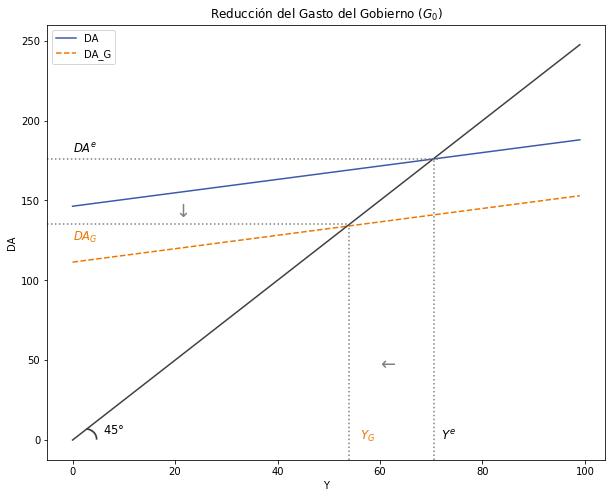

In [10]:
# Gráfico
y_max = np.max(DA_IS_K)
fig, ax = plt.subplots(figsize=(10, 8))


# Curvas a graficar
ax.plot(Y, DA_IS_K, label = "DA", color = "#3D59AB") #curva ORIGINAL
ax.plot(Y, DA_G, label = "DA_G", color = "#EE7600", linestyle = 'dashed') #NUEVA curva
ax.plot(Y, L_45, color = "#404040") #línea de 45º

# Lineas punteadas
plt.axvline(x = 70.5, ymin= 0, ymax = 0.69, linestyle = ":", color = "grey")
plt.axhline(y = 176, xmin= 0, xmax = 0.7, linestyle = ":", color = "grey")
plt.axvline(x = 54,  ymin= 0, ymax = 0.54, linestyle = ":", color = "grey")
plt.axhline(y = 135, xmin= 0, xmax = 0.54, linestyle = ":", color = "grey")

# Texto agregado
plt.text(0, 180, '$DA^e$', fontsize = 11.5, color = 'black')
plt.text(0, 125, '$DA_G$', fontsize = 11.5, color = '#EE7600')
plt.text(6, 4, '$45°$', fontsize = 11.5, color = 'black')
plt.text(2.5, -3, '$◝$', fontsize = 30, color = '#404040')
plt.text(72, 0, '$Y^e$', fontsize = 12, color = 'black')
plt.text(56, 0, '$Y_G$', fontsize = 12, color = '#EE7600')
plt.text(60, 45, '$←$', fontsize = 18, color = 'grey')
plt.text(20, 140, '$↓$', fontsize = 18, color = 'grey')

# Título y leyenda
ax.set(title = "Reducción del Gasto del Gobierno $(G_0)$", xlabel = r'Y', ylabel = r'DA')
ax.legend()

plt.show()


In [11]:
# Gráfico con movimiento

    # Parámetros
Y_size = 100 

Co = 35
Io = 40
Go = 70
Xo = 2
h = 0.7
b = 0.8
m = 0.2
t = 0.3
r = 0.9

Y = np.arange(Y_size)

    # Definir ecuación y gráfico para el parámetro específico
def DA_K(Go): # ecuación
    DA_K = (Co + Io + Go + Xo - h*r) + ((b - m)*(1 - t)*Y)
    
    # gráfico
    plt.subplots(figsize=(10, 8))
    plt.plot(Y, DA_K, label = "DA", color = "#3D59AB") #Demanda agregada
    plt.plot(Y, L_45, color = "#404040")
    plt.title('Gasto de Gobierno')
    plt.legend()    
    
    # crear gráfico con movimiento/control
Go_slide = widgets.FloatSlider(value = 70, min = 0, max = 110)  #widgets.FloatSlider(valor_inicial, min, max)
widgets.interact(DA_K, Go = Go_slide) #widgets.interact(nombre_función, parámetro = parámetro:_con_mov)


interactive(children=(FloatSlider(value=70.0, description='Go', max=110.0), Output()), _dom_classes=('widget-i…

<function __main__.DA_K(Go)>

- Intuición: 

$$ ↓Go → ↓DA → DA < Y → ↓Y $$

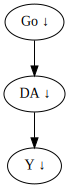

In [12]:
# Gráfico de causalidad

sprinkler = CausalGraphicalModel(nodes=["Go ↓","DA ↓","Y ↓"],
                                 edges=[("Go ↓","DA ↓"), ("DA ↓","Y ↓")])
sprinkler.draw()


- Matemáticamente: $∆G_0 < 0  →  ¿∆Y?$

$$ Y = \frac{1}{1 - (b - m)(1 - t)} (C_0 + I_0 + G_0 + X_0 - hr) $$

o, considerando el multiplicador keynesiano, $ k > 0 $:

$$ Y = k (C_0 + I_0 + G_0 + X_0 - hr) $$


$$ ∆Y = k (∆C_0 + ∆I_0 + ∆G_0 + ∆X_0 - ∆hr) $$

Pero, si no ha habido cambios en $C_0$, $I_0$, $X_0$, $h$ ni $r$, entonces: 

$$∆C_0 = ∆I_0 = ∆X_0 = ∆h = ∆r = 0$$

$$ ∆Y = k (∆G_0) $$


Sabiendo que $∆G_0 < 0 $ y que $k > 0$, la multiplicación de un número negativo con un positivo dará otro negativo:

$$ ∆Y = (+)(-) $$
$$ ∆Y < 0 $$

In [13]:
# Diferenciales

    # nombrar variables como símbolos
Co, Io, Go, Xo, h, r, b, m, t = symbols('Co Io Go Xo h r b m t')

    # determinar ecuación
f = (Co + Io + Go + Xo - h*r)/(1-(b-m)*(1-t))

    # función diferencial
df_Go = diff(f, Go) # diff(función, variable_analizar
df_Go #∆Y/∆Go

1/(-(1 - t)*(b - m) + 1)

#### Política fiscal expansiva con una reducción de la Tasa de Tributación $(t)$:

In [14]:
#--------------------------------------------------
# Curva de ingreso de equilibrio ORIGINAL

    # Parámetros
Y_size = 100 

Co = 35
Io = 40
Go = 70
Xo = 2
h = 0.7
b = 0.8
m = 0.2
t = 0.3 #tasa de tributación
r = 0.9

Y = np.arange(Y_size)

    # Ecuación 
def DA_K(Co, Io, Go, Xo, h, r, b, m, t, Y):
    DA_K = (Co + Io + Go + Xo - h*r) + ((b - m)*(1 - t)*Y)
    return DA_K

DA_IS_K = DA_K(Co, Io, Go, Xo, h, r, b, m, t, Y)


#--------------------------------------------------
# NUEVA curva de ingreso de equilibrio

    # Definir SOLO el parámetro cambiado
t = 0.01

# Generar la ecuación con el nuevo parámetros
def DA_K(Co, Io, Go, Xo, h, r, b, m, t, Y):
    DA_K = (Co + Io + Go + Xo - h*r) + ((b - m)*(1 - t)*Y)
    return DA_K

DA_t = DA_K(Co, Io, Go, Xo, h, r, b, m, t, Y)

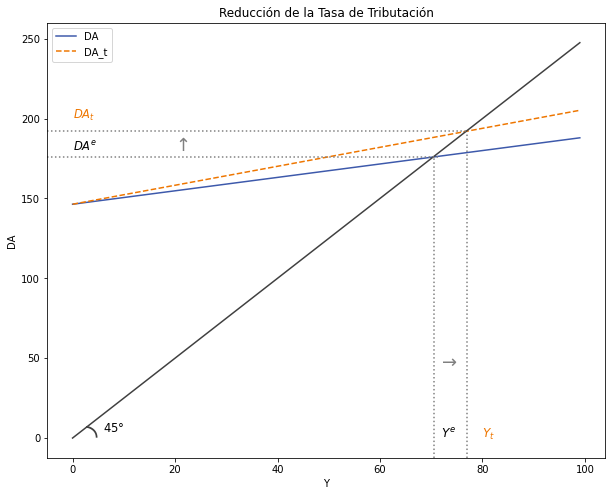

In [15]:
# Gráfico
y_max = np.max(DA_IS_K)
fig, ax = plt.subplots(figsize=(10, 8))


# Curvas a graficar
ax.plot(Y, DA_IS_K, label = "DA", color = "#3D59AB") #curva ORIGINAL
ax.plot(Y, DA_t, label = "DA_t", color = "#EE7600", linestyle = 'dashed') #NUEVA curva
ax.plot(Y, L_45, color = "#404040") #línea de 45º

# Lineas punteadas
plt.axvline(x = 70.5, ymin= 0, ymax = 0.69, linestyle = ":", color = "grey")
plt.axhline(y = 176, xmin= 0, xmax = 0.7, linestyle = ":", color = "grey")
plt.axvline(x = 77,  ymin= 0, ymax = 0.75, linestyle = ":", color = "grey")
plt.axhline(y = 192, xmin= 0, xmax = 0.75, linestyle = ":", color = "grey")

# Texto agregado
plt.text(0, 180, '$DA^e$', fontsize = 11.5, color = 'black')
plt.text(0, 200, '$DA_t$', fontsize = 11.5, color = '#EE7600')
plt.text(6, 4, '$45°$', fontsize = 11.5, color = 'black')
plt.text(2.5, -3, '$◝$', fontsize = 30, color = '#404040')
plt.text(72, 0, '$Y^e$', fontsize = 12, color = 'black')
plt.text(80, 0, '$Y_t$', fontsize = 12, color = '#EE7600')
plt.text(72, 45, '$→$', fontsize = 18, color = 'grey')
plt.text(20, 180, '$↑$', fontsize = 18, color = 'grey')

# Título y leyenda
ax.set(title = "Reducción de la Tasa de Tributación", xlabel = r'Y', ylabel = r'DA')
ax.legend()

plt.show()

In [16]:
# Gráfico con movimiento

# Parámetros
Y_size = 100 

Co = 35
Io = 40
Go = 70
Xo = 2
h = 0.7
b = 0.8
m = 0.2
t = 0.3
r = 0.9

Y = np.arange(Y_size)

    # Definir ecuación y gráfico para el parámetro específico
def DA_K(t): # ecuación
    DA_K = (Co + Io + Go + Xo - h*r) + ((b - m)*(1 - t)*Y)
    
    # gráfico
    plt.subplots(figsize=(10, 8))
    plt.plot(Y, DA_K, label = "DA", color = "#3D59AB") #Demanda agregada
    plt.plot(Y, L_45, color = "#404040")
    plt.title('Tasa de Tributación')
    plt.legend()    
    
    # crear gráfico con movimiento/control
t_slide = widgets.FloatSlider(value = 0.5, min = 0, max = 3)  #widgets.FloatSlider(valor_inicial, min, max)
widgets.interact(DA_K, t = t_slide) #widgets.interact(nombre_función, parámetro = parámetro:_con_mov)


interactive(children=(FloatSlider(value=0.5, description='t', max=3.0), Output()), _dom_classes=('widget-inter…

<function __main__.DA_K(t)>

- Intuición: ¿contradicción?

$$ t↓ → Co↑ → DA↑ → DA > Y → Y↑ $$
$$ t↓ → M↑ → DA↓ → DA < Y → Y↓ $$


- Matemáticamente: $∆t < 0  →  ¿∆Y?$

In [17]:
Co, Io, Go, Xo, h, r, b, m, t = symbols('Co Io Go Xo h r b m t')

f = (Co + Io + Go + Xo - h*r)/(1-(b-m)*(1-t))

df_t = diff(f, t)
df_t #∆Y/∆t

(-b + m)*(Co + Go + Io + Xo - h*r)/(-(1 - t)*(b - m) + 1)**2

Considernado el diferencial de $∆t$:

$$ \frac{∆Y}{∆t} = \frac{(m-b)(Co + Go + Io + Xo - hr)}{(1-(1-t)(b-m)+1)^2} $$

- Sabiendo que b > m, entonces $(m-b) < 0$
- Los componentes autónomos no cambian: $∆C_0 = ∆I_0 = ∆X_0 = ∆h = ∆r = 0$
- Cualquier número elevado al cuadrado será positivo: $ (1-(1-t)(b-m)+1)^2 > 0 $

Entonces:

$$ \frac{∆Y}{∆t} = \frac{(-)}{(+)} $$

Dado que $∆t < 0$, la división de dos positivos da otro positivo:

$$ \frac{∆Y}{(-)} = \frac{(-)}{(+)} $$

$$ ∆Y = \frac{(-)(-)}{(+)} $$

$$ ∆Y > 0 $$


-----------

## Ejercicios:

### Derive y grafique la función de demanda de Consumo.

In [18]:
# Parámetros

Y_size = 100 

Co = 35
b = 0.8
t = 0.3

Y = np.arange(Y_size)

# Ecuación de la curva del ingreso de equilibrio

def C(Co, b, t, Y):
    C = Co + b*(1-t)*Y
    return C

C = C(Co, b, t, Y)

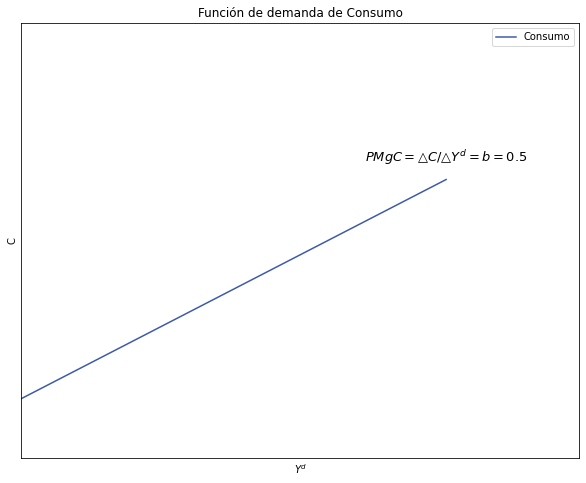

In [19]:
# Gráfico

# Dimensiones del gráfico
y_max = np.max(r)
fig, ax = plt.subplots(figsize=(10, 8))

custom_xlim = (0, 130)
custom_ylim = (20, 130)

plt.setp(ax, xlim=custom_xlim, ylim=custom_ylim)


# Curvas a graficar
ax.plot(Y, C, label = "Consumo", color = "#3D59AB") #Demanda agregada

# Eliminar las cantidades de los ejes
ax.yaxis.set_major_locator(plt.NullLocator())   
ax.xaxis.set_major_locator(plt.NullLocator())

# Texto agregado
    # punto de equilibrio
plt.text(80, 95, '$PMgC = △C/△Y^d = b = 0.5$', fontsize = 13, color = 'black')


# Título y leyenda
ax.set(title="Función de demanda de Consumo", xlabel= '$Y^d$', ylabel= 'C')
ax.legend() #mostrar leyenda

plt.show()

### Derive y grafique la función de demanda de Inversión.

In [20]:
# Parámetros

Io = 40
h = 0.7

r = np.arange(start = 0.01, stop = 1, step =0.01)  
r

# Ecuación de la curva del ingreso de equilibrio

def I(Io, h, r):
    I = Io - h*r
    return I

I = I(Io, h, r)

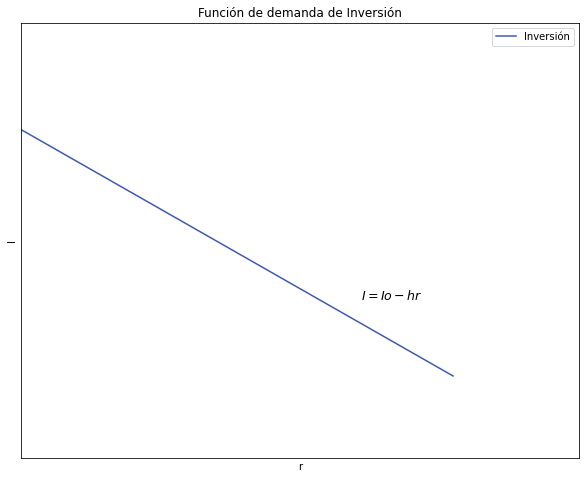

In [21]:
# Gráfico

# Dimensiones del gráfico
y_max = np.max(r)
fig, ax = plt.subplots(figsize=(10, 8))

custom_xlim = (0.1, 1.25)
custom_ylim = (39.1, 40.2)

plt.setp(ax, xlim=custom_xlim, ylim=custom_ylim)


# Curvas a graficar
ax.plot(r, I, label = "Inversión", color = "#3D59AB") #Demanda agregada

# Eliminar las cantidades de los ejes
ax.yaxis.set_major_locator(plt.NullLocator())   
ax.xaxis.set_major_locator(plt.NullLocator())

# Texto agregado
    # punto de equilibrio
plt.text(0.8, 39.5, '$I = Io - hr$', fontsize = 12.5, color = 'black')


# Título y leyenda
ax.set(title="Función de demanda de Inversión", xlabel= 'r', ylabel= 'I')
ax.legend() #mostrar leyenda

plt.show()

### ¿Cuáles son los supuestos del modelo Ingreso-Gasto Keynesiano?

1) Es un modelo de corto plazo.

2) El nivel de precios es rígido o fijo.

3) El nivel del producción $(Y)$ se adapta a los cambios de la Demanda Agregada $(DA)$.

4) La tasa de interés $(r)$ se determina afuera del modelo de Ingreso-Gasto. Se da en el mercado monetario $(LM)$.

### Encuentre y grafique el nivel de Ingreso de equilibrio $Y^e$ del modelo Ingreso-Gasto Keynesiano:

La ecuación de equilibrio para el Ingreso se deriva de la condición de equilibrio donde el nivel de producción es igual a la Demanda Agregada: $DA = Y$:

$$ DA = C + I + G + X - M $$

Donde:

$$ C = C_0 + bY^d $$
$$ I = I_0 - hr $$
$$ G = G_0 $$
$$ X = X_0 $$
$$ M = mY^d $$

$$ Y^d = 1 - t $$

Entonces: 

$$ DA = C_0 + I_0 + G_0 + X_0 - hr + Y(b - m)(1 - t) $$

De forma corta:

$$ DA = α_0 + α_1Y $$

Donde $ α_0 = (C_0 + I_0 + G_0 + X_0 -hr)$ es el intercepto y $ α_1 = (b - m)(1 - t) $ es la pendiente de la función

Ahora, considerando la condición de equilibrio $Y = DA$, la ecuación del ingreso de equilibrio a corto plazo es:

$$ Y^e = C_0 + bY^d + I_0 -hr + G_0 + X_0 - mY^d $$

$$ Y^e = \frac{1}{1 - (b - m)(1 - t)} (C_0 + I_0 + G_0 + X_0 - hr) $$

Donde $\frac{1}{1 - (b - m)(1 - t)}$ es el multiplicador keynesiano $(k)$.

In [22]:
# Parámetros

Y_size = 100 

Co = 35
Io = 40
Go = 70
Xo = 2
h = 0.7
b = 0.8 # b > m
m = 0.2
t = 0.3
r = 0.9

Y = np.arange(Y_size)

# Ecuación de la curva del ingreso de equilibrio

def DA_K(Co, Io, Go, Xo, h, r, b, m, t, Y):
    DA_K = (Co + Io + Go + Xo - h*r) + ((b - m)*(1 - t)*Y)
    return DA_K

DA_IS_K = DA_K(Co, Io, Go, Xo, h, r, b, m, t, Y)

In [23]:
# Recta de 45°

a = 2.5 

def L_45(a, Y):
    L_45 = a*Y
    return L_45

L_45 = L_45(a, Y)

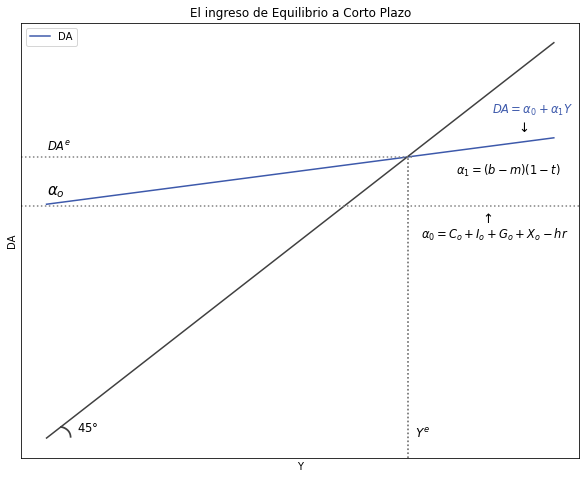

In [24]:
# Gráfico

# Dimensiones del gráfico
y_max = np.max(DA_IS_K)
fig, ax = plt.subplots(figsize=(10, 8))

# Curvas a graficar
ax.plot(DA_IS_K, label = "DA", color = "#3D59AB") #Demanda agregada
ax.plot(L_45, color = "#404040") #Línea de 45º

# Eliminar las cantidades de los ejes
ax.yaxis.set_major_locator(plt.NullLocator())   
ax.xaxis.set_major_locator(plt.NullLocator())

# Líneas punteadas punto de equilibrio
plt.axvline(x=70.5,  ymin= 0, ymax= 0.69, linestyle = ":", color = "grey")
plt.axhline(y=176, xmin= 0, xmax= 0.7, linestyle = ":", color = "grey")

plt.axvline(x=70.5,  ymin= 0, ymax= 0.69, linestyle = ":", color = "grey")
plt.axhline(y=145, xmin= 0, xmax= 1, linestyle = ":", color = "grey")

# Texto agregado
    # punto de equilibrio
plt.text(0, 180, '$DA^e$', fontsize = 11.5, color = 'black')
plt.text(72, 0, '$Y^e$', fontsize = 12, color = 'black')
plt.text(0, 152, '$α_o$', fontsize = 15, color = 'black')
    # línea 45º
plt.text(6, 4, '$45°$', fontsize = 11.5, color = 'black')
plt.text(2.5, -3, '$◝$', fontsize = 30, color = '#404040')
    # ecuaciones
plt.text(87, 203, '$DA = α_0 + α_1 Y$', fontsize = 11.5, color = '#3D59AB')
plt.text(80, 165, '$α_1 = (b-m)(1-t)$', fontsize = 11.5, color = 'black')
plt.text(73, 125, '$α_0 = C_o + I_o + G_o + X_o - hr$', fontsize = 11.5, color = 'black')

plt.text(92, 192, '$↓$', fontsize = 13, color = 'black')
plt.text(85, 135, '$↑$', fontsize = 13, color = 'black')

# Título y leyenda
ax.set(title="El ingreso de Equilibrio a Corto Plazo", xlabel= r'Y', ylabel= r'DA')
ax.legend() #mostrar leyenda

plt.show()

### El modelo de Ingreso-Gasto keynesiano con Regla Contracíclica:

#### Grafique la Funcion de demanda Agregada y la recta de 45 grados señalando los valores de intercepto y pendiente

In [25]:
# Parámetros

Y_size = 100 

Co = 35
Io = 40
Go = 70
g = 0.2 #solo valores entre 0-0.4
Xo = 2
h = 0.7
b = 0.8 # b > m
m = 0.2
t = 0.3
r = 0.9

Y = np.arange(Y_size)

# Ecuación de la curva del ingreso de equilibrio

def DA_C(Co, Io, Go, Xo, h, r, b, m, t, g, Y):
    DA_C = (Co  + Io + Go + Xo - h*r) + [(b-m)*(1-t)-g]*Y
    return DA_C

DA_Cont = DA_C(Co, Io, Go, Xo, h, r, b, m, t, g, Y)

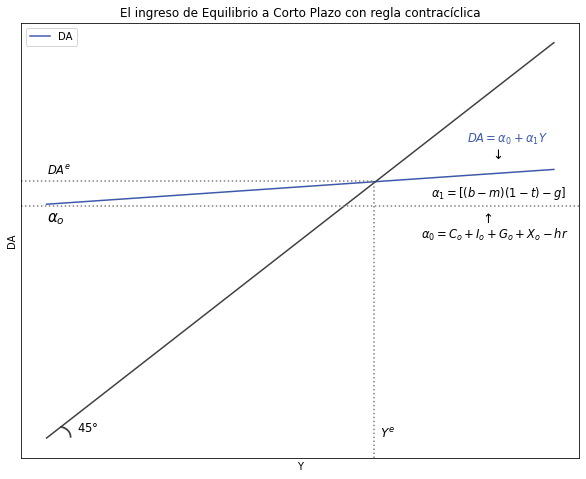

In [26]:
# Gráfico

# Dimensiones del gráfico
y_max = np.max(DA_Cont)
fig, ax = plt.subplots(figsize=(10, 8))

# Curvas a graficar
ax.plot(DA_Cont, label = "DA", color = "#3D59AB") #Demanda agregada
ax.plot(L_45, color = "#404040") #Línea de 45º

# Eliminar las cantidades de los ejes
ax.yaxis.set_major_locator(plt.NullLocator())   
ax.xaxis.set_major_locator(plt.NullLocator())

# Líneas punteadas punto de equilibrio
plt.axvline(x=64,  ymin= 0, ymax= 0.63, linestyle = ":", color = "grey")
plt.axhline(y=161, xmin= 0, xmax= 0.63, linestyle = ":", color = "grey")
plt.axhline(y=145, xmin= 0, xmax= 1, linestyle = ":", color = "grey")

# Texto agregado
    # punto de equilibrio
plt.text(0, 165, '$DA^e$', fontsize = 11.5, color = 'black')
plt.text(65, 0, '$Y^e$', fontsize = 12, color = 'black')
plt.text(0, 135, '$α_o$', fontsize = 15, color = 'black')
    # línea 45º
plt.text(6, 4, '$45°$', fontsize = 11.5, color = 'black')
plt.text(2.5, -3, '$◝$', fontsize = 30, color = '#404040')
    # ecuaciones
plt.text(82, 185, '$DA = α_0 + α_1 Y$', fontsize = 11.5, color = '#3D59AB')
plt.text(75, 151, '$α_1 = [(b-m)(1-t)-g]$', fontsize = 11.5, color = 'black')
plt.text(73, 125, '$α_0 = C_o + I_o + G_o + X_o - hr$', fontsize = 11.5, color = 'black')

plt.text(87, 175, '$↓$', fontsize = 13, color = 'black')
plt.text(85, 135, '$↑$', fontsize = 13, color = 'black')

# Título y leyenda
ax.set(title="El ingreso de Equilibrio a Corto Plazo con regla contracíclica", xlabel= r'Y', ylabel= r'DA')
ax.legend() #mostrar leyenda

plt.show()

#### Encuentre el nivel de Ingreso de Equilibrio

La ecuación de equilibrio para el Ingreso se deriva de la condición de equilibrio donde el nivel de producción es igual a la Demanda Agregada: $DA = Y$:

$$ DA = C + I + G + X - M $$

Donde:

$$ C = C_0 + bY^d $$
$$ I = I_0 - hr $$
$$ G = G_0 - gY $$
$$ X = X_0 $$
$$ M = mY^d $$

$$ Y^d = 1 - t $$

Entonces: 

$$ DA = C_0 + I_0 + G_0 + X_0 - hr + Y[(b - m)(1 - t) - g] $$

De forma corta:

$$ DA = α_0 + α_1Y $$

Donde $ α_0 = (C_0 + I_0 + G_0 + X_0 -hr)$ es el intercepto y $ α_1 = [(b - m)(1 - t) - g] $ es la pendiente de la función

Ahora, considerando la condición de equilibrio $Y = DA$, la ecuación del ingreso de equilibrio a corto plazo es:

$$ Y^e = \frac{1}{1 - (b - m)(1 - t) + g} (C_0 + I_0 + G_0 + X_0 - hr) $$

#### Analice una Política Fiscal Expansiva con aumento del Gasto del Gobierno

- Intuición: 

$$ ↑Go → ↑DA → DA > Y → ↑Y $$

- Matemáticamente: $∆G_0 < 0  →  ¿∆Y?$

In [27]:
# Diferenciales

    # nombrar variables como símbolos
Co, Io, Go, Xo, h, r, b, m, t, g = symbols('Co Io Go Xo h r b m t g')

    # determinar ecuación
f = (Co + Io + Go + Xo - h*r)/(1 - (b - m)*(1 - t) + g)

    # función diferencial
df_Go = diff(f, Go) # diff(función, variable_analizar
df_Go #∆Y/∆Go

1/(g - (1 - t)*(b - m) + 1)

Considernado el diferencial obtenido:

$$ \frac{∆Y}{∆Go} = \frac{1}{1 - (b - m)(1 - t) + g} $$

Sabiendo que al multiplicador keynesiano $(k > 0)$ se le adiciona el parámetro $g$, el denominador continuará siendo positivo (aunque más grande y con una pendiente de curva reducida).

Y considerando que $∆G_0 > 0 $, la multiplicación de un número positivo con otro positivo dará un positivo:

$$ \frac{∆Y}{(+)} = (+) $$
$$ ∆Y = (+)(+) $$
$$ ∆Y > 0 $$

- Gráficamente:

In [28]:
# Parámetros

Y_size = 100 

Co = 35
Io = 40
Go = 70
Xo = 2
h = 0.7
b = 0.8
m = 0.2
t = 0.3
r = 0.9
g = 0.2

Y = np.arange(Y_size)

# Ecuación de la curva del ingreso de equilibrio

def DA_C(Co, Io, Go, Xo, h, r, b, m, t, g, Y):
    DA_C = (Co  + Io + Go + Xo - h*r) + [(b-m)*(1-t)-g]*Y
    return DA_C

DA_Cont = DA_C(Co, Io, Go, Xo, h, r, b, m, t, g, Y)


# Nueva curva

Go = 100

def DA_C(Co, Io, Go, Xo, h, r, b, m, t, g, Y):
    DA_C = (Co  + Io + Go + Xo - h*r) + [(b-m)*(1-t)-g]*Y
    return DA_C

DA_C_G = DA_C(Co, Io, Go, Xo, h, r, b, m, t, g, Y)


In [29]:
# líneas punteadas autómaticas

    # definir la función line_intersection
def line_intersection(line1, line2):
    xdiff = (line1[0][0] - line1[1][0], line2[0][0] - line2[1][0])
    ydiff = (line1[0][1] - line1[1][1], line2[0][1] - line2[1][1])

    def det(a, b):
        return a[0] * b[1] - a[1] * b[0]

    div = det(xdiff, ydiff)
    if div == 0:
       raise Exception('lines do not intersect')

    d = (det(*line1), det(*line2))
    x = det(d, xdiff) / div
    y = det(d, ydiff) / div
    return x, y

    # coordenadas de las curvas (x,y)
A = [DA_Cont[0], Y[0]] # DA, coordenada inicio
B = [DA_Cont[-1], Y[-1]] # DA, coordenada fin

C = [L_45[0], Y[0]] # L_45, coordenada inicio
D = [L_45[-1], Y[-1]] # L_45, coordenada fin

    # creación de intersección

intersec = line_intersection((A, B), (C, D))
intersec # (y,x)

(160.4934210526316, 64.19736842105264)

In [30]:
    # coordenadas de las curvas (x,y)
A = [DA_C_G[0], Y[0]] # DA, coordenada inicio
B = [DA_C_G[-1], Y[-1]] # DA, coordenada fin

C = [L_45[0], Y[0]] # L_45, coordenada inicio
D = [L_45[-1], Y[-1]] # L_45, coordenada fin

    # creación de intersección

intersec_G = line_intersection((A, B), (C, D))
intersec_G # (y,x)

(193.38815789473685, 77.35526315789474)

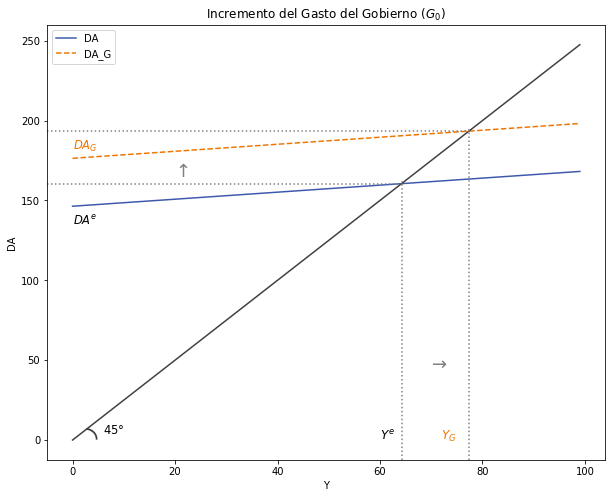

In [31]:
# Gráfico
y_max = np.max(DA_Cont)
fig, ax = plt.subplots(figsize=(10, 8))


# Curvas a graficar
ax.plot(DA_Cont, label = "DA", color = "#3D59AB") #curva ORIGINAL
ax.plot(DA_C_G, label = "DA_G", color = "#EE7600", linestyle = 'dashed') #NUEVA curva
ax.plot(L_45, color = "#404040") #línea de 45º

# Lineas punteadas
plt.axhline(y=intersec[0], xmin= 0, xmax= 0.64, linestyle = ":", color = "grey")
plt.axvline(x=intersec[1], ymin= 0, ymax= 0.64, linestyle = ":", color = "grey")

plt.axhline(y=intersec_G[0], xmin= 0, xmax= 0.76, linestyle = ":", color = "grey")
plt.axvline(x=intersec_G[1], ymin= 0, ymax= 0.76, linestyle = ":", color = "grey")


# Texto agregado
plt.text(0, 135, '$DA^e$', fontsize = 11.5, color = 'black')
plt.text(0, 182, '$DA_G$', fontsize = 11.5, color = '#EE7600')
plt.text(6, 4, '$45°$', fontsize = 11.5, color = 'black')
plt.text(2.5, -3, '$◝$', fontsize = 30, color = '#404040')
plt.text(60, 0, '$Y^e$', fontsize = 12, color = 'black')
plt.text(72, 0, '$Y_G$', fontsize = 12, color = '#EE7600')
plt.text(70, 45, '$→$', fontsize = 18, color = 'grey')
plt.text(20, 165, '$↑$', fontsize = 18, color = 'grey')

# Título y leyenda
ax.set(title = "Incremento del Gasto del Gobierno $(G_0)$", xlabel = r'Y', ylabel = r'DA')
ax.legend()

plt.show()

#### Analice una crisis mundial que reduce nuestras exportaciones $(M<0)$.

- Intuición: 

$$ ↓Xo → ↓DA → DA < Y → ↓Y $$

- Matemáticamente:

In [32]:
# Diferenciales

    # nombrar variables como símbolos
Co, Io, Go, Xo, h, r, b, m, t, g = symbols('Co Io Go Xo h r b m t g')

    # determinar ecuación
f = (Co + Io + Go + Xo - h*r)/(1 - (b - m)*(1 - t) + g)

    # función diferencial
df_Xo = diff(f, Xo) # diff(función, variable_analizar
df_Xo #∆Y/∆Go

1/(g - (1 - t)*(b - m) + 1)

Considernado el diferencial obtenido:

$$ \frac{∆Y}{∆X_0} = \frac{1}{1 - (b - m)(1 - t) + g} $$

Sabiendo que al multiplicador keynesiano $(k > 0)$ se le adiciona el parámetro $g$, el denominador continuará siendo positivo (aunque más grande y con una pendiente de curva reducida).

Y considerando que $∆X_0 < 0 $, la multiplicación de un número positivo con un negativo dará un negativo:

$$ \frac{∆Y}{(-)} = (+) $$
$$ ∆Y = (-)(+) $$
$$ ∆Y < 0 $$

- Gráficamente

In [33]:
# Parámetros

Y_size = 100 

Co = 35
Io = 40
Go = 70
g = 0.2 #solo valores entre 0-0.4
Xo = 15
h = 0.7
b = 0.8 # b > m
m = 0.2
t = 0.3
r = 0.9

Y = np.arange(Y_size)

# Ecuación de la curva del ingreso de equilibrio

def DA_C(Co, Io, Go, Xo, h, r, b, m, t, g, Y):
    DA_C = (Co  + Io + Go + Xo - h*r) + [(b-m)*(1-t)-g]*Y
    return DA_C

DA_Cont = DA_C(Co, Io, Go, Xo, h, r, b, m, t, g, Y)


# Nueva curva

Xo = 1

def DA_C(Co, Io, Go, Xo, h, r, b, m, t, g, Y):
    DA_C = (Co  + Io + Go + Xo - h*r) + [(b-m)*(1-t)-g]*Y
    return DA_C

DA_C_X = DA_C(Co, Io, Go, Xo, h, r, b, m, t, g, Y)


In [34]:
# líneas punteadas autómaticas

    # definir la función line_intersection
def line_intersection(line1, line2):
    xdiff = (line1[0][0] - line1[1][0], line2[0][0] - line2[1][0])
    ydiff = (line1[0][1] - line1[1][1], line2[0][1] - line2[1][1])

    def det(a, b):
        return a[0] * b[1] - a[1] * b[0]

    div = det(xdiff, ydiff)
    if div == 0:
       raise Exception('lines do not intersect')

    d = (det(*line1), det(*line2))
    x = det(d, xdiff) / div
    y = det(d, ydiff) / div
    return x, y

    # coordenadas de las curvas (x,y)
A = [DA_Cont[0], Y[0]] # DA, coordenada inicio
B = [DA_Cont[-1], Y[-1]] # DA, coordenada fin

C = [L_45[0], Y[0]] # L_45, coordenada inicio
D = [L_45[-1], Y[-1]] # L_45, coordenada fin

    # creación de intersección

intersec = line_intersection((A, B), (C, D))
intersec # (y,x)

(174.7478070175439, 69.89912280701755)

In [35]:
    # coordenadas de las curvas (x,y)
A = [DA_C_X[0], Y[0]] # DA, coordenada inicio
B = [DA_C_X[-1], Y[-1]] # DA, coordenada fin

C = [L_45[0], Y[0]] # L_45, coordenada inicio
D = [L_45[-1], Y[-1]] # L_45, coordenada fin

    # creación de intersección

intersec_X = line_intersection((A, B), (C, D))
intersec_X # (y,x)

(159.39692982456143, 63.75877192982457)

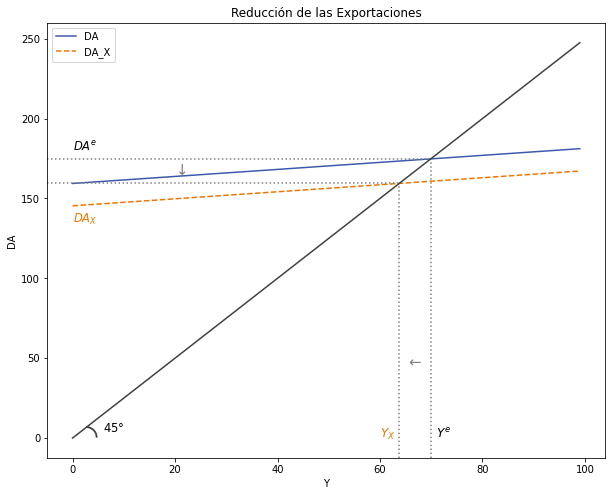

In [36]:
# Gráfico
y_max = np.max(DA_Cont)
fig, ax = plt.subplots(figsize=(10, 8))


# Curvas a graficar
ax.plot(DA_Cont, label = "DA", color = "#3D59AB") #curva ORIGINAL
ax.plot(DA_C_X, label = "DA_X", color = "#EE7600", linestyle = 'dashed') #NUEVA curva
ax.plot(L_45, color = "#404040") #línea de 45º

# Lineas punteadas
plt.axhline(y=intersec[0], xmin= 0, xmax= 0.68, linestyle = ":", color = "grey")
plt.axvline(x=intersec[1], ymin= 0, ymax= 0.68, linestyle = ":", color = "grey")

plt.axhline(y=intersec_X[0], xmin= 0, xmax= 0.63, linestyle = ":", color = "grey")
plt.axvline(x=intersec_X[1], ymin= 0, ymax= 0.63, linestyle = ":", color = "grey")


# Texto agregado
plt.text(0, 180, '$DA^e$', fontsize = 11.5, color = 'black')
plt.text(0, 135, '$DA_X$', fontsize = 11.5, color = '#EE7600')
plt.text(6, 4, '$45°$', fontsize = 11.5, color = 'black')
plt.text(2.5, -3, '$◝$', fontsize = 30, color = '#404040')
plt.text(71, 0, '$Y^e$', fontsize = 12, color = 'black')
plt.text(60, 0, '$Y_X$', fontsize = 12, color = '#EE7600')
plt.text(65.5, 45, '$←$', fontsize = 15, color = 'grey')
plt.text(20, 165, '$↓$', fontsize = 15, color = 'grey')

# Título y leyenda
ax.set(title = "Reducción de las Exportaciones", xlabel = r'Y', ylabel = r'DA')
ax.legend()

plt.show()